# Leitura dos Dados do Sensor RBR na praia da Reserva Test Francisco

In [1]:
# import libraries

import os
import numpy as np
import pylab as pl
import datetime as dt
import proconda
import jonswap
import espec
import pandas as pd
%matplotlib inline

In [3]:
pathname = 'C:\\Users\\Francisco\\Dropbox\\nemes\\data\\ADCP_Reef_Reserva\\'

In [4]:
lista = np.sort(os.listdir(pathname))
lista 
# lista os dir, e coloca em ordem , blz

array(['20131122', '20150701', '20150720', '20150729', '20150805',
       '20150910', '20150915', '20150916', '20151014', '20151111',
       '20151120', '20151214', '20151221', '20160113', '20160128'], 
      dtype='<U8')

In [5]:
dayf = lista[4]
listarq = np.sort(os.listdir(pathname + dayf))
listarq
# Pegando o dir 4 e listando, blz, 

array(['ADCP', 'ADCP_REEF_05-08-2015.a1', 'ADCP_REEF_05-08-2015.a2',
       'ADCP_REEF_05-08-2015.a3', 'ADCP_REEF_05-08-2015.csv',
       'ADCP_REEF_05-08-2015.dat', 'ADCP_REEF_05-08-2015.hdr',
       'ADCP_REEF_05-08-2015.nmea', 'ADCP_REEF_05-08-2015.sen',
       'ADCP_REEF_05-08-2015.ssl', 'ADCP_REEF_05-08-2015.v1',
       'ADCP_REEF_05-08-2015.v2', 'ADCP_REEF_05-08-2015.v3',
       'ADCP_REEF_05-08-2015.wad', 'ADCP_REEF_05-08-2015.whd',
       'ADCP_REEF_05-08-2015000.wad', 'ADCP_REEF_05-08-2015001.wad',
       'ADCP_REEF_05-08-2015002.wad', 'ADCP_REEF_05-08-2015003.wad',
       'ADCP_REEF_05-08-2015004.wad', 'ADCP_REEF_05-08-2015005.wad',
       'ADCP_REEF_05-08-2015006.wad', 'ADCP_REEF_05-08-2015007.wad',
       'ADCP_REEF_05-08-2015008.wad', 'ADCP_REEF_05-08-2015009.wad',
       'ADCP_REEF_05-08-2015010.wad', 'ADCP_REEF_05-08-2015011.wad',
       'ADCP_REEF_05-08-2015012.wad', 'ADCP_REEF_05-08-2015013.wad',
       'ADCP_REEF_05-08-2015014.wad', 'ADCP_REEF_05-08-2015015.wad',
    

In [6]:
dateparse = lambda x: pd.datetime.strptime(x,'%m %d %Y %H %M %S')
# transforma as datas automaticamente ao ler o dado, blz

In [7]:
# leitura dos dados (a1, sen, v1, v2, v3, whd, wad) 

for i in range(len(listarq)):

    if listarq[i].endswith(dayf[0:4] + '.a1'):
        a1 = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+')

    elif listarq[i].endswith(dayf[0:4] + '.sen'):
        sen = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, parse_dates=[[0,1,2,3,4,5]], date_parser=dateparse,
            index_col='mo_dy_yr_hr_mn_sec',
            names=['mo','dy','yr','hr','mn','sec','er_code','st_code','bat','soudspd','head','pitch','roll','pres','temp','anin1','anin2'])

    elif listarq[i].endswith(dayf[0:4] + '.v1'):
        v1 = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, names=['c1','c2','c3','c4','c5','c6'])

    elif listarq[i].endswith(dayf[0:4] + '.v2'):
        v2 = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, names=['c1','c2','c3','c4','c5','c6'])

    elif listarq[i].endswith(dayf[0:4] + '.v3'):
        v3 = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, names=['c1','c2','c3','c4','c5','c6'])

    elif listarq[i].endswith(dayf[0:4] + '.whd'):
        whd = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, parse_dates=[[0,1,2,3,4,5]], date_parser=dateparse, 
            index_col='mo_dy_yr_hr_mn_sec',
            names=['mo','dy','yr','hr','mn','sec','burstc','nodata','celpos','bat','soudspd','head','pitch','roll','minpres',
            'maxpres','temp','celsize','namp1','namp2','namp3','namp4','astst','astsz','astof'])

    elif listarq[i].endswith(dayf[0:4] + '.wad'):
        print (listarq[i])
        wad = pd.read_table(pathname + dayf + '/' + listarq[i], sep='\s+', header=None, index_col=False,
            names=['burst','count','pres','spare','analog','vxe','vyn','vzu','amp1','amp2','amp3','ampna'])

ADCP_REEF_05-08-2015.wad


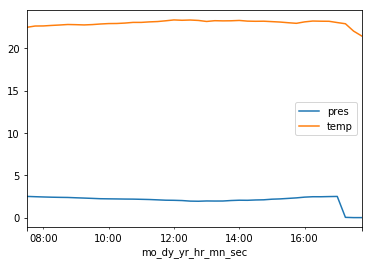

In [8]:
# para plotar por fora: %matplotlib qt5
sen[['pres','temp']].plot()# entao o que coloque antes do plot ele plota, blz,
pl.show()

In [8]:
sen.describe()

,er_code,st_code,bat,soudspd,head,pitch,roll,pres,temp,anin1,anin2
count,42.0,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.0
mean,0.0,1.111000e+07,12.595238,1529.397619,281.583333,-4.930952,-4.357143,2.060786,23.000476,0.0,0.0
std,0.0,1.543033e-01,0.069677,0.925120,60.828102,3.855214,2.545311,0.601604,0.361501,0.0,0.0
min,0.0,1.111000e+07,12.500000,1525.500000,17.100000,-28.400000,-5.600000,0.000000,21.470000,0.0,0.0
25%,0.0,1.111000e+07,12.525000,1528.950000,296.725000,-4.775000,-5.075000,2.046250,22.845000,0.0,0.0
50%,0.0,1.111000e+07,12.600000,1529.750000,297.400000,-4.700000,-4.900000,2.189000,23.100000,0.0,0.0
75%,0.0,1.111000e+07,12.600000,1529.900000,297.500000,-4.350000,-4.825000,2.372500,23.227500,0.0,0.0
max,0.0,1.111000e+07,12.700000,1530.300000,298.000000,1.600000,9.400000,2.506000,23.370000,0.0,0.0


In [9]:
#cria vetor de tempo para onda (intercalando as amostragens)
wad['time'] = 0

cont = 0
cont1 = 0
cont2 = 0 #wad.burst.loc[wad.burst == cont].shape[0]
for i in range(len(whd)):

    cont += 1

    #tamanho do vetor da hora
    cont2 = wad.burst.loc[wad.burst == cont].shape[0] + cont2
    
    aux = pd.date_range(whd.index[i], periods=wad.burst.loc[wad.burst == cont].shape[0], freq='500ms')

    wad.time[cont1:cont2] = aux

    cont1 = cont2 

wad = wad.set_index('time')

C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


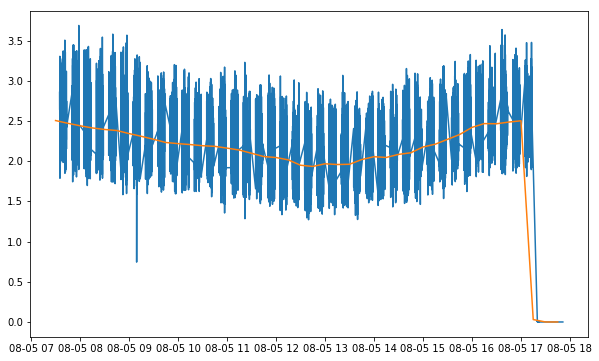

In [10]:

%matplotlib inline 
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.plot(wad.index, wad.pres)
ax1.plot(sen.index, sen.pres)


pl.show() 
